# Exploratory Data Analysis (Car Sales Dataset)
<a id=section0></a>
## Table Of Contents
- 1. [Problem Statement](#section1)<br>
    - 1.1 [Introduction](#section101)<br>
- 2. [Importing Packages](#section2)<br>
- 3. [Data Loading](#section3)<br>
    - 3.1 [Data Description](#section301)<br>
    - 3.2 [Data Profiling](#section302)<br>
        - 3.2.1 [Data Understanding](#section30201)<br>
        - 3.2.2 [Rename Columns name](#section30202)<br>        
        - 3.2.3 [Pandas Profiling before Data Preprocessing](#section30203)<br>
- 4. [Data Preprocessing](#section4)<br>
    - 4.1 [Remove duplicates](#section401)<br>
    - 4.2 [Drop column model due to high cardinality](#section402)<br>
    - 4.3 [Dealing with zero values](#section403)<br>
    - 4.4 [Dealing with missing values](#section404)<br>
    - 4.5 [Pandas Profiling before Data Preprocessing](#section405)<br>    
- 5. [Exploratory Data Analysis](#section5)<br>
    - 5.1 [Remove duplicates](#section501)<br>
    - 5.2 [Drop column model due to high cardinality](#section502)<br>
    - 5.3 [Dealing with zero values](#section503)<br>
    - 5.4 [Dealing with missing values](#section504)<br>
    - 5.5 [Pandas Profiling before Data Preprocessing](#section505)<br> 
    - 5.6 [Remove duplicates](#section506)<br>
    - 5.7 [Drop column model due to high cardinality](#section507)<br>
    - 5.8 [Dealing with zero values](#section508)<br>
    - 5.9 [Dealing with missing values](#section509)<br>
    - 5.10 [Pandas Profiling before Data Preprocessing](#section510)<br>
    - 5.11 [Remove duplicates](#section511)<br>
    - 5.12 [Drop column model due to high cardinality](#section512)<br>
    - 5.13 [Dealing with zero values](#section513)<br>
    - 5.14 [Dealing with missing values](#section514)<br>
    - 5.15 [Pandas Profiling before Data Preprocessing](#section515)<br> 
    - 5.16 [Remove duplicates](#section516)<br>
    - 5.17 [Drop column model due to high cardinality](#section517)<br>
    - 5.18 [Dealing with zero values](#section518)<br>
    - 5.19 [Dealing with missing values](#section519)<br>
    - 5.20 [Pandas Profiling before Data Preprocessing](#section520)<br>
    - 5.21 [Remove duplicates](#section521)<br>
    - 5.22 [Drop column model due to high cardinality](#section522)<br>
    - 5.23 [Dealing with zero values](#section523)<br>
- 6. [Conclusion](#section6)<br>

<a id=section1></a>
### 1. Problem Statement

This dataset is the collection of all the sales that were made by a car dealer from 1953 to 2016.

<a id=section101></a>
#### 1.1 Introduction
This Exploratory Data Analysis on a structured data set includes loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

### 2. Importing Packages<a id=section2></a>
[Table Of Contents](#section0)

In [134]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

import pandas_profiling

### 3. Data Loading<a id=section3></a>
- This dataset was collected from car sale advertisements in 2016.
- This dataset contains data for more than 9.5K cars sale records.

[Table Of Contents](#section0)

In [192]:
cardata = pd.read_csv('car_sales.csv', sep=',', encoding='latin-1')

#### 3.1 Data Description<a id=section301></a>
- This data was collected from private car sale advertisements.
- This dataset is real raw data which has all inconvenient moments (as NA’s for example).
- The dataset comprises of **9576 observations of 10 columns**. 

Below is a table showing names of all the columns and their description.
<table align='left'>
    <thead>
        <style>
            td {
              text-align: left;
            }
        </style>
    <tr>
        <th>Column Name</th>
        <th>Description</th>
    </tr>
    <thead>    
    <tbody>
        <tr>
            <td>car</td>
            <td>Manufacturer Name</td>
        </tr>
        <tr>
            <td>price</td>
            <td>Selling price(in USD)</td>
        </tr>
        <tr>
            <td>body</td>
            <td>Car body type</td>
        </tr>
        <tr>
            <td>mileage</td>
            <td>as mentioned in advertisement (‘000 Km)</td>
        </tr>
        <tr>
            <td>engV</td>
            <td>Rounded engine volume (‘000 cubic cm)</td>
        </tr>
        <tr>
            <td>engType</td>
            <td>Type of fuel <br/>(“Other” in this case should be treated as NA)</td>
        </tr>
        <tr>
            <td>registration</td>
            <td>If car is registered or not</td>
        </tr>
        <tr>
            <td>year</td>
            <td>Year of production</td>
        </tr>
        <tr>
            <td>model</td>
            <td>Model name</td>
        </tr>
        <tr>
            <td>drive</td>
            <td>Drive type</td>
        </tr>
    </tbody>
</table>

[Table Of Contents](#section0)
#### 3.2 Data Profiling<a id=section302></a>
- We will first understand our dataset using various pandas functionalities.
- Then we will do pandas profiling to find out which columns of our dataset need preprocessing.
- In preprocessing we will deal with zero and missing values columns.
- again we will do pandas profiling to see how preprocessing have transformed our dataset

#### 3.2.1 Data Understanding<a id=section30201></a>

In [138]:
cardata.head()    # This will print top 5 rows of dataset

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [139]:
cardata.info()    # This will show index, data type and memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


*From above output, it is understood that the dataset contains missing values in engV and drive columns*
- We can see all numeric columns having count 9576 except engV. Looks like this column has some missing values
- We cal also see that the categorial column **drive** has 9065 values. This can also be a case of missing values.

In [39]:
cardata.describe(include='all')    # This will display statistical information of dataset

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,863,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


Here we can see that **price** and **mileage** columns have a minimum value of zero,<br> zero values does not make sense and indicates an invalid or missing value.

In [193]:
cardata.shape    # This will print the no. of row and columns

(9576, 10)

In [35]:
cardata.columns     # This will print name of all columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [36]:
cardata.dtypes    # This will print datatypes of all columns

car             object 
price           float64
body            object 
mileage         int64  
engV            float64
engType         object 
registration    object 
year            int64  
model           object 
drive           object 
dtype: object

*From above output, it is understood that the dataset has 9576 rows and 10 columns.<br>
Also we can see that price and mileage columns have a minimum value of zero, zero values does not make sense and indicates an invalid or missing value.*

In [198]:
cardata.isnull().sum()    # This will print count of NaN values in column

Brand           0  
price           0  
body            0  
mileage         0  
engV            434
engType         0  
registration    0  
prod_year       0  
model           0  
drive           510
dtype: int64

*From the above output we can see that **engV** and **drive** columns contains null values.<br>
Will not consider 0 as missing or invalid value at the moment, will see further how to deal with them*

[Table Of Contents](#section0)

#### 3.2.2 Rename Columns name<a id=section30202></a>

In [195]:
# Rename some columns name, to get meaningful information
cardata.rename(columns={'car':'Brand','year':'prod_year'},inplace=True) 
cardata.shape

(9576, 10)

[Table Of Contents](#section0)
#### 3.2.3 Pandas Profiling before Data Preprocessing<a id=section30203></a>
- By pandas profiling, an interactive HTML report is generated.
    - It contains all the information about the columns of the dataset (counts and type of each column).
    - Detailed information about each column
    - Co-relation between different columns
    - A sample of dataset.
- It gives us visual interpretation of each column in the data.
- Spread of the data can be better understood by the distribution plot.
- Grannular level analysis of each column.

In [196]:
preprofile = pandas_profiling.ProfileReport(cardata)
preprofile.to_file(output_file="cardata_preprocessing.html")

*Have done Pandas Profiling before preprocessing our dataset and named the html file as **cardata_preprocessing.html**.<br> We can find useful insight by analyzing this file.*

[Table Of Contents](#section0)
<a id=section4></a>
### 4. Data Preprocessing 

From the above report generated, we get 
- Dataset has 113 (1.2%) duplicate rows -----------------> __NEED TO DROP DUPLICATE VALUES__
- drive has 511 (5.3%) missing values --------------------> __NEED TO DROP/REPLACE MISSING VALUES__
- engV has 434 (4.5%) missing values --------------------> __NEED TO DROP/REPLACE MISSING VALUES__
- mileage has 348 (3.6%) zeros -----------------------------> __NEED TO DROP/REPLACE ZERO VALUES__
- model has a high cardinality: 863 distinct values -----> __NEED TO DROP HIGH CARDINALITY VALUES__
- price has 267 (2.8%) zeros----------------------------------> __NEED TO DROP/REPLACE ZERO VALUES__

#### Initial observation as a result from profiling of Carsale Dataset can be seen in cardata_preprocessing.html
![](PreProcessing.png)

#### 4.1 Remove Duplicates (113 records)<a id=section401></a>

In [197]:
cardata.drop_duplicates(keep='first', inplace=True)
cardata.shape

(9463, 10)

This dataset had **113** duplicate rows, which was removed here and now **9463** unique rows are present in dataset

#### 4.2 Drop column model due to high cardinality.<a id=section402></a>

In [227]:
cardata.drop(['model'], axis=1, inplace=True)
cardata.shape

(9463, 9)

[Table Of Contents](#section0)
#### 4.3 Dealing with zero values<a id=section403></a>

- Replacing zero values of **price** column with **mean value** of price.

In [200]:
df_mean_price = cardata.price.mean()
df_mean_price

15303.858895873407

In [210]:
cardata[cardata.price == 0]['price'].count()

240

From the above output we can see that **price** column has **240 rows** with **zero** values

In [211]:
cardata['price'] = cardata['price'].replace(0, df_mean_price)
cardata[cardata['price'] == 0]

,Brand,price,body,mileage,engV,engType,registration,prod_year,model,drive


From above output we can observe that, now price column doesnot have any zero values entries.

Replacing **zero** values of **mileage** column with **mean value** of price.

In [222]:
mileage_mean = cardata.mileage.mean()
mileage_mean

139.92465391524885

In [221]:
cardata[cardata.mileage == 0]['mileage'].count()

310

From the above output we can see that **mileage** column has **310** rows with **zero values**.

In [223]:
cardata['mileage'] = cardata['mileage'].replace(0, mileage_mean)
cardata[cardata['price'] == 0]

,Brand,price,body,mileage,engV,engType,registration,prod_year,model,drive


From above output we can observe that, now price column doesnot have any zero values entries.

[Table Of Contents](#section0)
#### 4.4 Dealing with missing values<a id=section404></a>

- Replacing **null values** of **engV** column with **median value** of engV column.

In [212]:
cardata.isnull().sum()

Brand           0  
price           0  
body            0  
mileage         0  
engV            434
engType         0  
registration    0  
prod_year       0  
model           0  
drive           510
dtype: int64

As per the above output **engV** column has **433 null values**, now we will replace these null values with **median** of engV column.

In [232]:
df_median_engV = cardata.engV.median()
df_median_engV

2.0

In [214]:
cardata['engV'].fillna(df_median_engV, inplace=True)
cardata.isnull().sum() 

Brand           0  
price           0  
body            0  
mileage         0  
engV            0  
engType         0  
registration    0  
prod_year       0  
model           0  
drive           510
dtype: int64

From above output, its confirmed that all the **null values** of **engV** column are **replaced**.

However, **drive column** has **508 null values**, drive column has **categorical** values so we will replace null values with mode of drive column.

In [216]:
df_mode_drive = cardata.drive.mode()
df_mode_drive

0    front
dtype: object

In [218]:
cardata['drive'].fillna(df_mode_drive[0], inplace=True)
cardata.isnull().sum() 

Brand           0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
prod_year       0
model           0
drive           0
dtype: int64

Now as per the above output none of the columns have null values.

[Table Of Contents](#section0)
#### 4.5 Pandas Profiling before Data Preprocessing<a id=section405></a>

In [228]:
postprofile = pandas_profiling.ProfileReport(cardata)
postprofile.to_file(output_file="cardata_postprocessing.html")

In [230]:
cardata.describe(include='all')

,Brand,price,body,mileage,engV,engType,registration,prod_year,drive
count,9463,9463.000000,9463,9463.000000,9463.000000,9463,9463,9463.000000,9463
unique,87,NaN,6,NaN,NaN,4,2,NaN,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,front
freq,927,NaN,3622,NaN,NaN,4341,8902,NaN,5681
mean,NaN,15691.994385,NaN,144.508469,2.612026,NaN,NaN,2006.525837,NaN
std,NaN,22924.914348,NaN,95.042570,5.826202,NaN,NaN,7.062584,NaN
min,NaN,259.350000,NaN,1.000000,0.100000,NaN,NaN,1953.000000,NaN
25%,NaN,5500.000000,NaN,80.000000,1.600000,NaN,NaN,2004.000000,NaN
50%,NaN,9700.000000,NaN,136.000000,2.000000,NaN,NaN,2008.000000,NaN
75%,NaN,16500.000000,NaN,195.000000,2.500000,NaN,NaN,2012.000000,NaN


We have processed the data and now the dataset does not contain any missing values. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. 

- Observations:
    - In the Dataset info, Total Missing(%) = 0.0%
    - Number of variables = 10
    
![](PostProcessing.png)

[Table Of Contents](#section0)
    
### 5. Exploratory Data Analysis<a id=section5></a>

#### 5.1 Which brand of cars sold the most ?<a id=section501></a>

Text(0,0.5,'No. of vehicles')

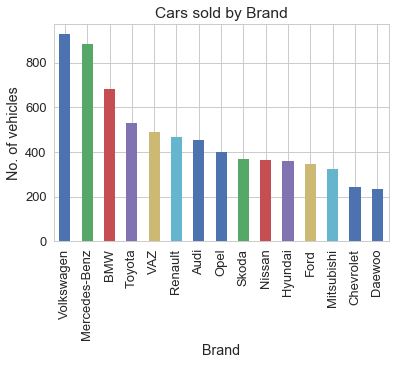

In [241]:
cardata.Brand.value_counts().nlargest(15).plot.bar(tick)
plt.title('Cars sold by Brand')
plt.xlabel("Brand")
plt.ylabel('No. of vehicles')

By this chart we can say that **Volkswagen** is the highest selling car, closely followed by **Mercedes-Benz and BMW**.

[Table Of Contents](#section0)
#### 5.2 Which body type of cars sold the most ?<a id=section502></a>

Text(0,0.5,'No. of vehicles')

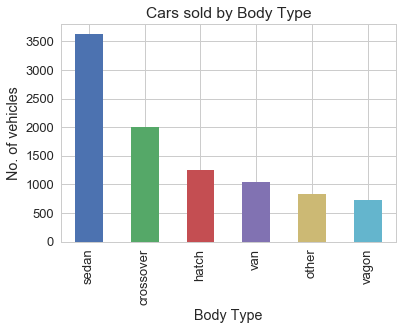

In [244]:
cardata.body.value_counts().plot(kind='bar')
plt.title('Cars sold by Body Type')
plt.xlabel("Body Type")
plt.ylabel('No. of vehicles')

This chart says that **"Sedan"** body type cars are the most sold cars, if we want to see it in terms of %, then we can see it in below chart. We can say this in other terms that the most preferred choice for people is Sedan, because it is the perfect and comfortable car for small size family within lower budget.

Text(0,0.5,'% of vehicles')

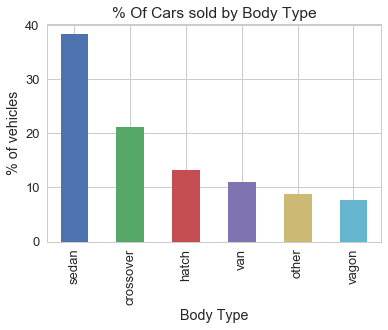

In [251]:
(cardata.body.value_counts()/len(cardata)*100).plot(kind='bar')
plt.title('% Of Cars sold by Body Type')
plt.xlabel("Body Type")
plt.ylabel('% of vehicles')

From above chart we can say that approx **38%** of total cars sold are Sedan body type, **21%** are Crossover body type and **13%** are Hatch body type.<br>Thus we can say that the most preferred choice for people are **Sedan type cars**, because these are perfect and comfortable car for small size family, within lower budget.

[Table Of Contents](#section0)
#### 5.3 Which drive type of cars sold the most ?<a id=section503></a>

Text(0.5,1,'Drive Segment pie chart')

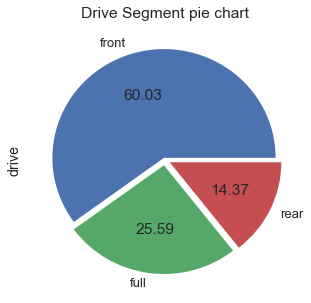

In [265]:
cardata.drive.value_counts().plot(kind='pie', autopct='%.2f', figsize=(5,5), explode=[0.02,0.05,0.05])
plt.title("Drive Segment pie chart")
#plt.ylabel('Number of vehicles')
#plt.xlabel('Drive Type');

From above chart we can say that **front drive** cars are the most sold cars.<br>In terms of percentage we can say that, approx **61%** of total cars sold are **front drive** type, **25%** are **full drive** type and **14%** in **rear drive** type.

[Table Of Contents](#section0)
#### 5.4 Body Type v/s Drive Type Analysis <a id=section504></a>

Text(0,0.5,'No. Of Vehicles')

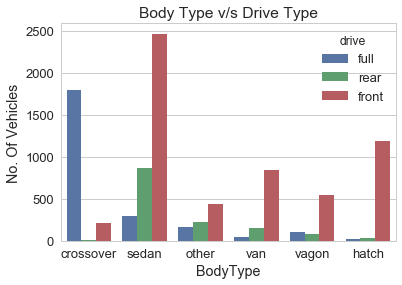

In [272]:
sns.countplot(data=cardata, x='body', hue='drive')
plt.title('Body Type v/s Drive Type')
plt.xlabel('BodyType')
plt.ylabel('No. Of Vehicles')

- **Front Drive** cars are the top sellers in all body type except for **Crossover** body type cars.
- In **Crossover** body type, **full** wheel drive is the leading seller/most preferred car.

[Table Of Content](#section0)
#### 5.5 Which price segment cars are sold most ? <a id=section505></a>

In [275]:
print("min = ",cardata.price.min())
print("max = ",cardata.price.max())

min =  259.35
max =  547800.0


This dataset has minimum price of car as **259.35** and maximum price as **547800**.<br>Hence, we can create a new field called **price_group** having few groups (say 5~6)

In [293]:
bins = [0, 20000,40000,60000,80000,100000,300000, 600000]
lab = ['<20K','20-39K','40-59K','60-79K','80-99K','100-299K','>300K']
cardata['price_group'] = pd.cut(cardata.price,bins=bins, labels=lab, include_lowest=True)
cardata.price_group = cardata.price_group.astype(object)
cardata.head()

,Brand,price,body,mileage,engV,engType,registration,prod_year,drive,price_group
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,full,<20K
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,rear,20-39K
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,rear,20-39K
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,front,<20K
4,Mercedes-Benz,33000.0,vagon,91.0,2.0,Other,yes,2013,front,20-39K


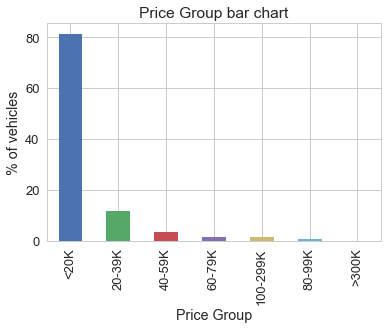

In [294]:
(cardata.price_group.value_counts()/len(cardata)*100).plot(kind='bar')
plt.title("Price Group bar chart")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

By this chart we can say that **approx 80%** of cars sold are in price range of **less than or equal to 20000**.<br>
By this we can infer that people in the surveyed data prefered cheaper cars.

In [310]:
#cardata[cardata.price_group == '<20K' & cardata.Brand == 'Mercedes-Benz']
con1 = cardata.price_group == '<20K'
con2 = cardata.Brand == 'Mercedes-Benz'
cardata[con1 & con2].count()
#cardata.price_group == '<20K' & cardata.Brand == 'Mercedes-Benz'

Brand           576
price           576
body            576
mileage         576
engV            576
engType         576
registration    576
prod_year       576
drive           576
price_group     576
dtype: int64

[Table Of Content](#section0)
#### 5.6 Which Brand is selling highest in low price segment <a id=section506></a>

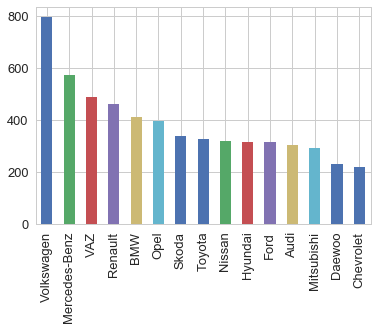

In [320]:
brand = cardata[cardata.price_group == '<20K'].Brand
brand.value_counts().nlargest(15).plot.bar()

**Volkswagon** is the leading brand in lower price segment followed by **Mercedes-Benz**

[Table Of Content](#section0)
#### 5.7 Which Brand is selling highest in higher price segment<a id=section507></a>

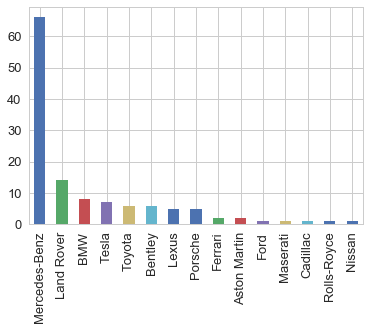

In [324]:
c1 = cardata.price_group == '100-299K'
c2 = cardata.price_group == '>300K'
brand = cardata[cardata.price >= 100000].Brand
brand.value_counts().nlargest(15).plot.bar()

**Mercedes-Benz** is the leading brand in higher price segment cars

[Table Of Content](#section0)
#### 5.8 Lower segment sedan types<a id=section508></a>

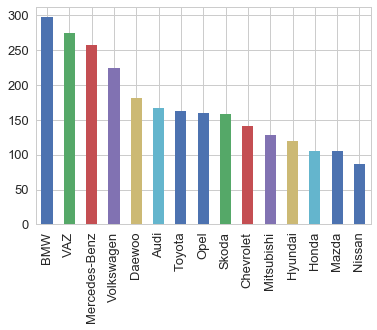

In [837]:
c1 = cardata.price_group == '<20K'
c2 = cardata.body == 'sedan'
cardata[c1 & c2].Brand.value_counts().nlargest(15).plot.bar()

As **Sedan** type of cars are most selling, from above chart it is observed that, in lower price segment, **BMW** is the leader in this segment closely followed by **VAZ** and **Mercedes-Benz**

[Table Of Content](#section0)
#### 5.9 Highest selling brand in sedan type <a id=section509></a>

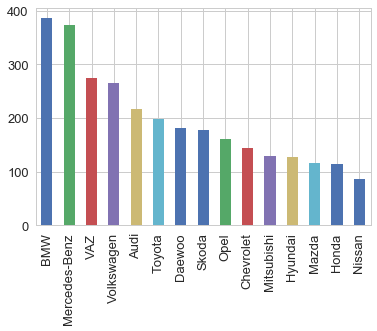

In [331]:
cardata[cardata.body == 'sedan'].Brand.value_counts().nlargest(15).plot.bar()

As **Sedan** type of cars are most selling, from above chart it is observed that, in higher price segment, **BMW** is the leader in this segment closely followed by **Mercedes-Benz** and **VAZ**.

[Table Of Content](#section0)
#### 5.10 Top 10 highest selling brands in lower price segment vs bodytype<a id=section510></a>

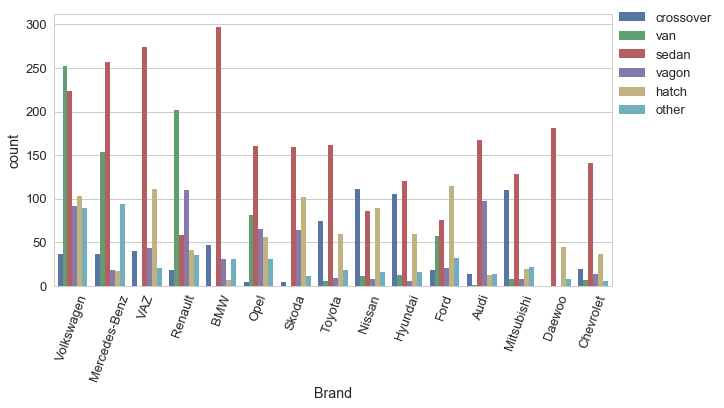

In [440]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

lowvalue = cardata[cardata.price_group == '<20K']
# ser = lowvalue.Brand.value_counts().nlargest(10)
# lst = ["Volkswagen","Mercedes-Benz","VAZ","Renault","BMW","Opel","Skoda","Toyota","Nissan","Hyundai"]
lst = lowvalue.Brand.value_counts().nlargest(15).index
sns.countplot(x='Brand', data=lowvalue, order=lst, hue='body')

plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.2,1.05))

From above chart, it is observed that **sedan** type of cars are the highest selling cars in lower price segment for all the brands except for **Volkswagon** and **Renault**, which have **Van** type of cars selling more.

In lower price segment leading brands for each body type are as below :<br>
- *Sedan* : **BMW**, closely followed by VAZ and Mercedes-Benz<br>
- *Van* :  **Volkswagon**, followed by Renault and Mercedes-Benz<br>
- *Vagon* : **Renault**, followed by Audi and Volkswagon<br>
- *Crossover* : **Mitsubishi and Nissan** followed by Hyundai<br>
- *Hatch* : **Ford** followed by VAZ and Volkswagon<br>

[Table Of Content](#section0)
#### 5.11 How does price relate to body and drive type of car?<a id=section511></a>

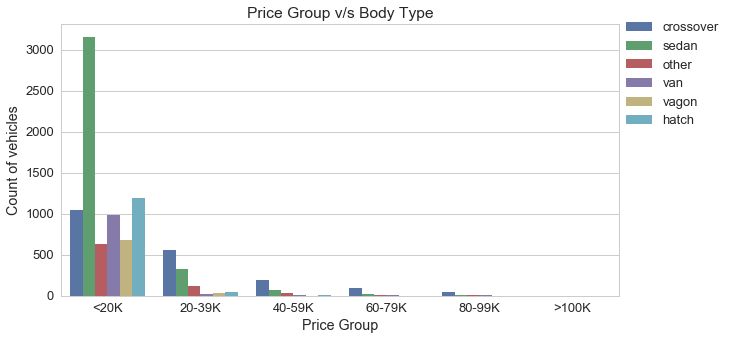

In [462]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

lst = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K']
sns.countplot(data=cardata, x='price_group', hue='body', order=lst)
plt.title("Price Group v/s Body Type")
plt.xlabel('Price Group')
plt.ylabel('Count of vehicles');
plt.legend(bbox_to_anchor=(1.2,1.05))

By observing the above chart, we can say
- Most of the cars are sold in price range **250 to 19999**. Majority of these cars are **sedan body type**.
- **Crossover body type** cars are highest selling unit in price range of **20000 or above**.

#### 5.12 Price group v/s Drive type<a id=section512></a>

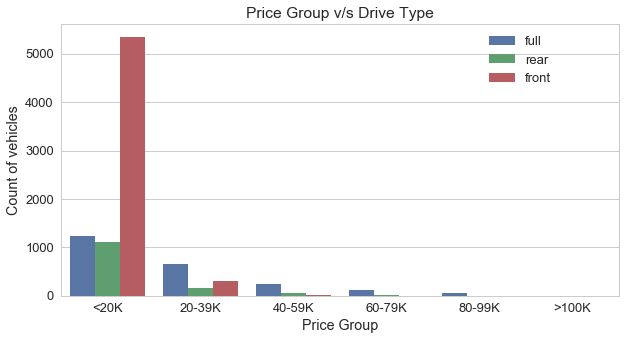

In [472]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

lst = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K']
sns.countplot(data=cardata, x='price_group', hue='drive', order=lst)
plt.title("Price Group v/s Drive Type")
plt.xlabel('Price Group')
plt.ylabel('Count of vehicles');
plt.legend(bbox_to_anchor=(0.9,1.0))

By this chart we can say that

- The most cars sold are in price range of **250 to 19999** and majority of these are in **Front drive type**.
- The majority of **Full drive type** are Cars sold at a price range of **20000 or above**.

[Table Of Content](#section0)
#### 5.13 Average price of vehicles by body type and drive type<a id=section513></a>

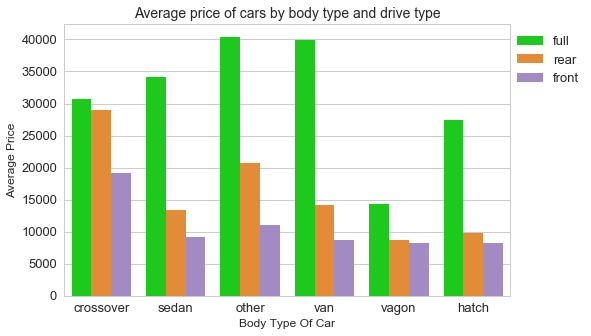

In [557]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

colors = ["#00e600", "#ff8c1b","#a180cd"]
sns.barplot(x='body', y='price', hue='drive', 
           data=cardata, palette=colors, ci=None)  # ci=None to remove the confindence interval bar
plt.xlabel("Body Type Of Car",fontdict= {'size':12})
plt.ylabel("Average Price",fontdict= {'size':12})
plt.title("Average price of cars by body type and drive type",fontdict= {'size':14})
plt.legend(bbox_to_anchor=(1.18,1.0))

From above chart we can say that all body types of cars have more average price for full drive type cars compare to other drive types.

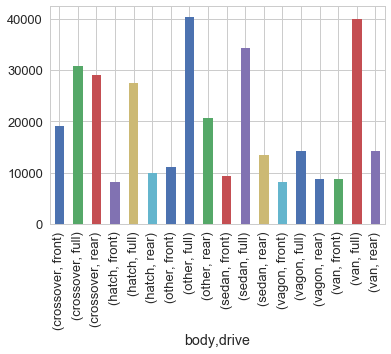

In [514]:
cardata.groupby(['body','drive'])['price'].agg('mean').plot.bar()
#cardata.groupby(['body','drive'])['price'].agg('mean')

[Table Of Content](#section0)
#### 5.14 Does the engType have any impact on price of the car?<a id=section514></a>

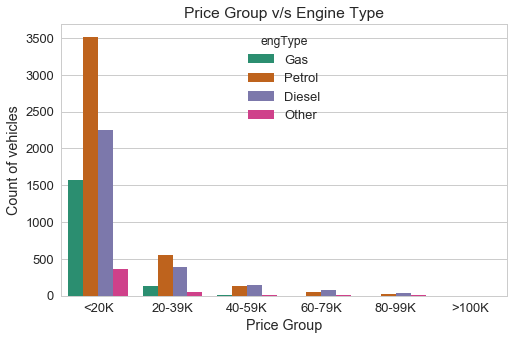

In [588]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

lst = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K']
sns.countplot(data=cardata, x='price_group', hue='engType', order=lst, palette="Dark2")

plt.title('Price Group v/s Engine Type')
plt.xlabel('Price Group')
plt.ylabel('Count of vehicles');

By this chart we can say that

- The most cars are sold in price range of **200 to 19999** and majority of these are in **Petrol** engine type.
- The majority of **Diesel** engine type in Cars sold at a price **20000 or above**.

[Table Of Content](#section0)
#### 5.15 How does price relate to engine type (engType) and drive type of the car? <a id=section515></a>

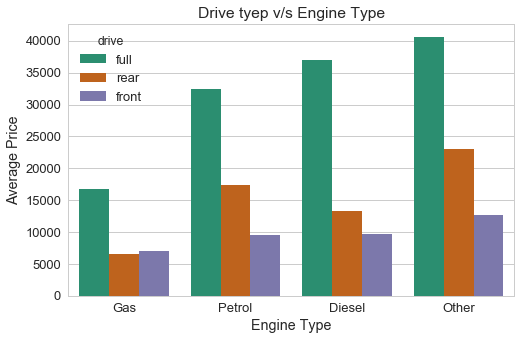

In [589]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

sns.barplot(data=cardata, x='engType', y='price', hue='drive', palette='Dark2',ci=None)

plt.title('Drive tyep v/s Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price');

- From above chart we can say that **full drive** cars have higher average price in all **engine type** cars.
- **Front drive** cars are cheaper in all **engine types** with a marginal exemption for **gas** engine cars.

[Table Of Content](#section0)
#### 5.16 Which engine volume (engV) cars sold the most ?<a id=section516></a>

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

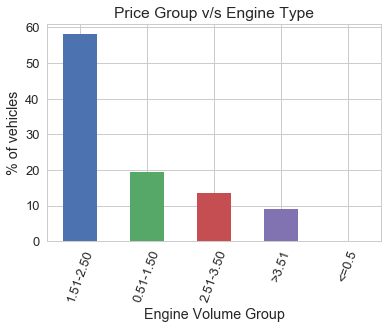

In [836]:
engVolGrp = [0,0.51,1.51,2.51,3.51,100]
lab = ['<=0.5','0.51-1.50','1.51-2.50','2.51-3.50','>3.51']
engVolumes = pd.cut(cardata.engV, engVolGrp, labels=lab)
(engVolumes.value_counts()/len(cardata)*100).plot(kind='bar')

plt.title('Price Group v/s Engine Type')
plt.xlabel('Engine Volume Group')
plt.ylabel('% of vehicles');
plt.xticks(rotation=70)

From above chart, below is the list of top three categories of Engine Volume (engV) cars sold.

- ***1st Category*** : > 1.5 & <= 2.5 (In this category approx **55%** of cars are available)
- ***2nd Category*** : > 0.5 & <= 1.5 (In this category approx **19%** of cars are available)
- ***3rd Category*** : > 2.5 & <= 3.5 (In this category approx **18%** of cars are available)

Out of total cars sold, **approx 92%** cars fall in range of engine volume more than **1.5 CC to 3.5 CC**

[Table Of Content](#section0)
#### 5.17 Engine volume wise count of vehicles<a id=section517></a>

(0, 7)

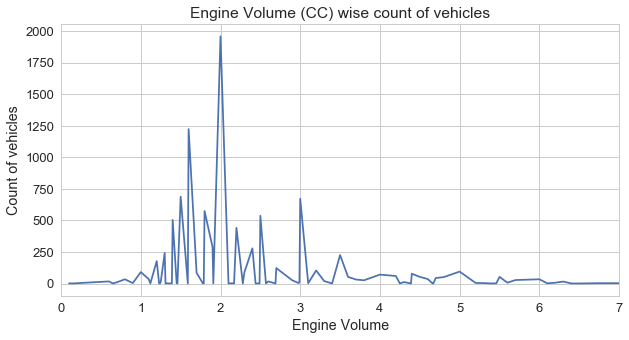

In [691]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
cardata[cardata.engV <= 8].engV.value_counts().sort_index().plot.line()
#plt.xticks(np.arange(0, 9, step=1))
plt.title("Engine Volume (CC) wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Engine Volume');
plt.xlim(0,7)

From above chart we can say that most of the cars sold have **2.0 CC** engine volume followed by **1.6 CC**, there are very few cars sold with engine volume **less than equal to 1.0 CC and greater than equal to 4.0 CC**.

[Table Of Content](#section0)
#### 5.18 How does engine volume (engV) relate to mileage of the car?<a id=section518></a>

([<matplotlib.axis.XTick at 0x17ebf418710>,
 <a list of 8 Text xticklabel objects>)

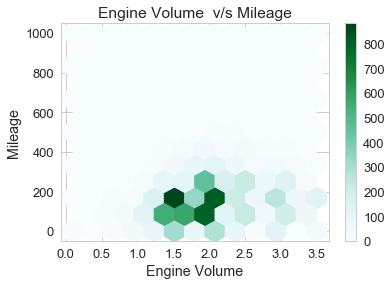

In [707]:
cardata[cardata.engV <= 3.5].plot.hexbin(x='engV', y='mileage', gridsize=12, sharex=False)
plt.title("Engine Volume  v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Engine Volume');
plt.xticks(np.arange(0,4, step=0.5))

From above chart we can say that **1.5 CC engine volume (engV)** cars are the highest selling cars with a mileage of **approx 200**.

[Table Of Content](#section0)
#### 5.19 How does price is relate to mileage?<a id=section519></a>

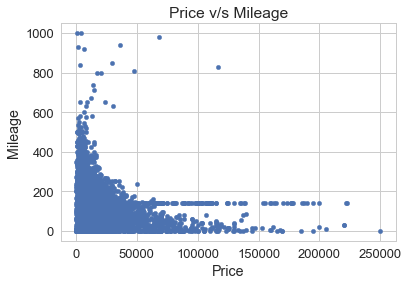

In [719]:
cardata[cardata.price < 250000].plot.scatter(x='price', y='mileage')
plt.title("Price v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Price');

From above chart we can say that **price and mileage have strogly negative correlation** in sold car dataset , i.e. lower price segment has higher mileage and higher price segment has lower mileage.

#### 5.20 How does price is relate to production year ?<a id=section520></a>

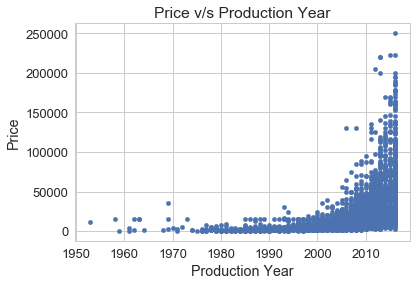

In [718]:
cardata[cardata.price < 250000].plot.scatter(y='price', x='prod_year')
plt.title("Price v/s Production Year")
plt.ylabel('Price')
plt.xlabel('Production Year');

From the above chart we can say that
- Majority of the cars with **production year 2008 or earlier**, were sold at **price 50000 or lower**.
- All the cars with **production year 2010 or later** were sold at **price more than 50000**.

[Table Of Content](#section0)
#### 5.21 Which production year of cars sold the most ? <a id=section521></a>

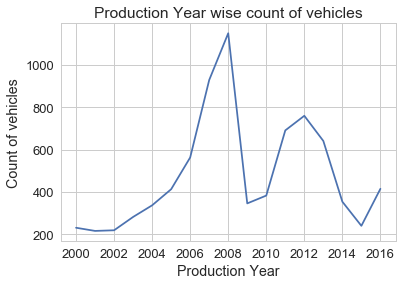

In [763]:
pyear = cardata[cardata.prod_year >= 2000].prod_year
pyear.value_counts().sort_index().plot.line()

plt.xticks(np.arange(2000,2017, step=2))
plt.title("Production Year wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Production Year');

From above chart, we can say that car were sold most in year **2008 and 2012**.

#### 5.22 How does production year relate to registration?<a id=section522></a>

<Figure size 1440x576 with 0 Axes>

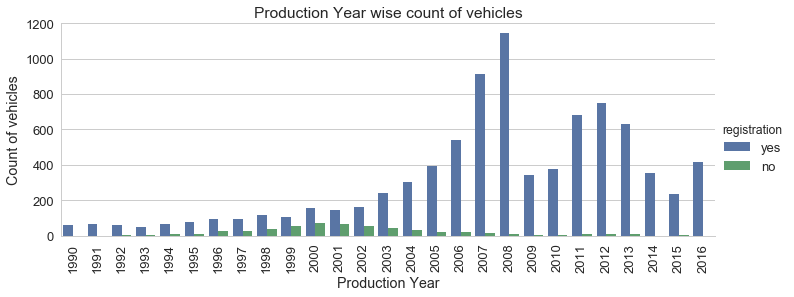

<Figure size 1440x576 with 0 Axes>

In [776]:
s = sns.factorplot('prod_year', data=cardata[cardata.prod_year >= 1990], 
                   kind='count', hue='registration', size=4, orient="h", aspect=2.5)
s.set_xticklabels(rotation=90)
plt.title("Production Year wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Production Year');
plt.figure(figsize=(20,8))

From above chart we can say that majority of the cars sold with **production year 2008 or later were registered**.

[Table Of Content](#section0)
#### 5.23 Correlation between various features of car data.<a id=section523></a>

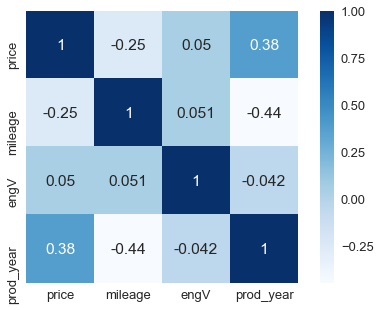

In [791]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
cor = cardata.corr()
cor
sns.heatmap(cor, annot=True, square=True, cmap='Blues')
#plt.figure(figsize=(20,20))

From the above heat map, we can say that :

- **price and production year** variables have **strong positive correlation**, i.e. latest production year cars have high price and older production year cars have lower price.
- **price and engine volume** (engV) have **mild positive correlation**.
- **engine volume (engV) and mileage** also have some **mild positive correlation**, generally engine volume and mileage do not have positive correlation, but in our data most of the cars have engine volume in between 1.5 CC to 2.5 CC, due to that mileage and engine volume have mild positive correlation.
- **production year and mileage** variables have **strong negative correlation**, i.e. latest production year cars have low mileage compared to older production year cars.
- **price and mileage** have **negative correlation**, i.e. lower price cars have higher mileage and higher price cars have lower mileage.
- **production year and engine volume** (engV) also have some **negative correlation**.

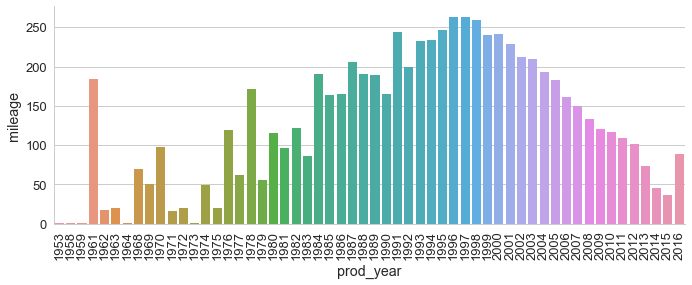

In [807]:
s = sns.factorplot(data=cardata, x='prod_year', y='mileage', kind='bar', ci=None,aspect=2.5, size=4)
s.set_xticklabels(rotation=90)

In [815]:
cardata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 11 columns):
Brand           9463 non-null object
price           9463 non-null float64
body            9463 non-null object
mileage         9463 non-null float64
engV            9463 non-null float64
engType         9463 non-null object
registration    9463 non-null object
prod_year       9463 non-null int64
drive           9463 non-null object
price_group     9463 non-null object
engVolumes      9463 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB


[Table Of Content](#section0)
### 6. Conclusion <a id=section6></a>

- In this dataset We have total 9463 observations after removing duplicate records.
- We observe that out of total cars sold, majority of the cars sold by **Volkswagen, Mercedes-Benz and BMW** brand.
- **Sedan, Crossover and Hatch** body types cars are the highest sold cars.
- **Front wheel drive** cars are the highest sold cars, because most of the cars of this segment falls in lower price range.
- **Front wheel drive** cars are the top selling cars in all body type except for **Crossover** body type. In **Crossover** body type **Full wheel drive** cars are leading.
- **80%** of total cars sold in the price range of **200 to 20000** with body type as **Sedan**, drive type as **Front** and engine type as **Petrol**, because the middle class families preferred low price cars with Sedan body and Petrol engine type (ease of maintainence).
- **Mercedes-Benz** is the leading brand in higher price segment cars.
- Majority of the **higher price range** cars sold with body type as **Crossover**, drive type as **Full** and engine type as **Diesel**.
- All body segment of cars have **more average price for Full drive** type cars compare to other drive type cars.
- All engine types of cars have **more average price for Full drive** type cars compare to other drive type cars.
- Approx **55%** of total cars sold have engine volume in the range of **1.5 CC to 2.5 CC**.
- Most of the cars sold in **2.0 CC** engine volume segment followed by **1.5 CC**, there are **very few cars sold below 1.0 CC and above 4.0 CC**.
- It is observed that **lower price segment car has higher mileage** and higher price segment car has lower mileage.
- Majority of the cars with **production year 2008 or later were registered** and sold at **price of 50000 or above**.
- Production year **2008 and 2012** cars are the highest sold cars.
- **Price** has **positive correlation** with **engine volume and production year** and **negative** correlation with **mileage**.
- **Production year** has **negative correlation** with **mileage and engine volume**.